# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:

place_name = " Bockhorn, Landkreis Friesland, Niedersachsen, 26345, Germany"


In [3]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)


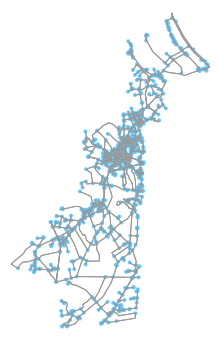

In [4]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [5]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [6]:
#col_names has all the important building information columns that could be of interest for gerda
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
#loop to find the columns actually in buildings dataframe and their unique value
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['car_wash', 'shelter', 'doctors', 'pub', 'place_of_worship', 'social_facility', 'police']
shop = ['doityourself', 'farm', 'supermarket', 'furniture', 'bakery', 'butcher']
building = ['yes', 'farm', 'greenhouse', 'house', 'hut', 'commercial', 'garage', 'detached', 'silo', 'cabin', 'roof', 'apartments', 'carport', 'supermarket', 'retail', 'residential', 'industrial', 'farm_auxiliary', 'stable', 'garages', 'barn', 'service', 'shed', 'semidetached_house', 'hotel']
office = ['company']
['amenity', 'shop', 'building', 'office']


### first visualisation

In [7]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets, off track route
nodes, edges = ox.graph_to_gdfs(graph)

#extra just for healthcare for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(place_name, amenities=healthcare)

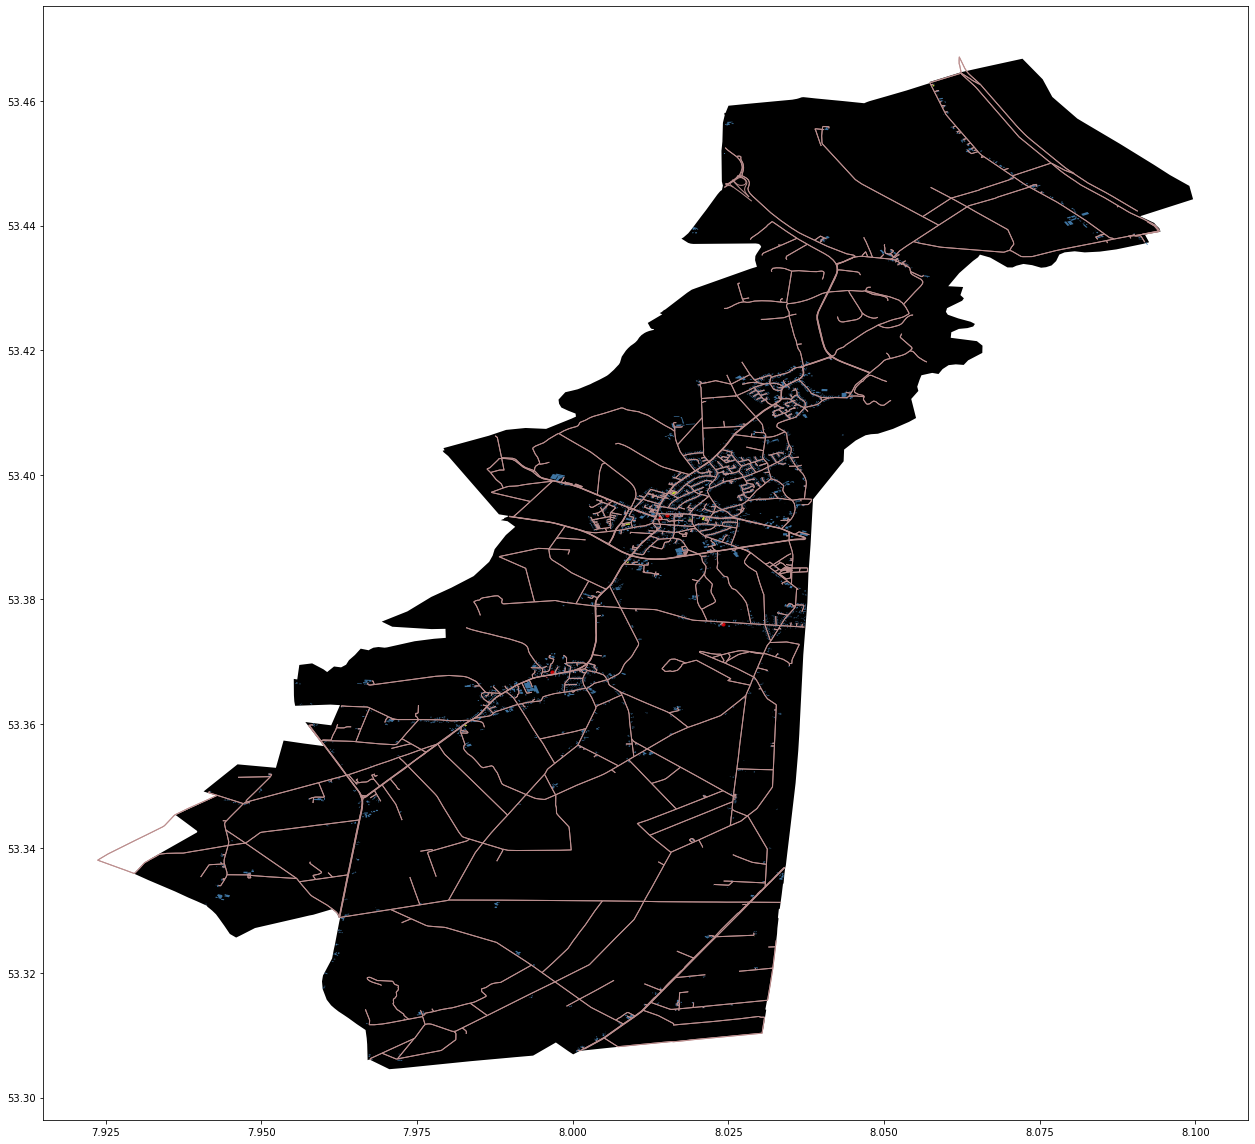

In [8]:
#first little viz
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [9]:
ox.pd.set_option('display.max_rows', None)


In [10]:
boish

osmid                                           geometry  \
1548371161  1548371161                           POINT (8.02409 53.37598)   
1580648951  1580648951                           POINT (8.01395 53.39303)   
1692728096  1692728096                           POINT (8.01520 53.39354)   
2520775288  2520775288                           POINT (7.99660 53.36826)   
493475562    493475562  POLYGON ((8.01061 53.39405, 8.01053 53.39396, ...   
493720252    493720252  POLYGON ((8.00576 53.39567, 8.00567 53.39559, ...   
731536543    731536543  POLYGON ((7.99591 53.36751, 7.99598 53.36734, ...   

           addr:city addr:housenumber addr:postcode   addr:street addr:suburb  \
1548371161  Bockhorn               13         26345     Grafenweg  Osterforde   
1580648951       NaN              NaN           NaN           NaN         NaN   
1692728096  Bockhorn                3         26345  Lange Straße         NaN   
2520775288       NaN              NaN           NaN           NaN         NaN   
493475562   Bockhorn               12         26345  Urwaldstraße         NaN   
493720252   Bockhorn                1         26345     Am Urwald         NaN   
731536543   Bockhorn               32         26345   Hauptstraße         NaN   

                    amenity  \
1548371161  social_facility   
1580648951         pharmacy   
1692728096         pharmacy   
2520775288          doctors   
493475562           doctors   
493720252           doctors   
731536543   social_facility   

                                                         name  \
1548371161                Senioren- und Pflegeheim Osterforde   
1580648951                                  Apotheke Am Markt   
1692728096                                  Apotheke Bockhorn   
2520775288                                           Ute Döhr   
493475562                              Dr. med. Egbert Völkel   
493720252   Dr. Mathias Vogel und Dr. Eckart Bartels (Geme...   
731536543   GPS Heilpädagogischer Wohnverbund Windrad Grab...   

                      phone  ...     contact:phone  social_facility  \
1548371161              NaN  ...  +49 4453 9821-11     nursing_home   
1580648951              NaN  ...               NaN              NaN   
1692728096    +49 4453 7572  ...               NaN              NaN   
2520775288    +49 4452 8412  ...               NaN              NaN   
493475562     +49 4453 7547  ...               NaN              NaN   
493720252   +49 4453 989855  ...               NaN              NaN   
731536543     +494452709930  ...               NaN  assisted_living   

           social_facility:for emergency     description:de  fax  \
1548371161              senior       NaN                NaN  NaN   
1580648951                 NaN       NaN                NaN  NaN   
1692728096                 NaN       NaN                NaN  NaN   
2520775288                 NaN       NaN  Allgemein Medizin  NaN   
493475562                  NaN       NaN                NaN  NaN   
493720252                  NaN       NaN                NaN  NaN   
731536543                  NaN       NaN                NaN  NaN   

                                                        nodes addr:state  \
1548371161                                                NaN        NaN   
1580648951                                                NaN        NaN   
1692728096                                                NaN        NaN   
2520775288                                                NaN        NaN   
493475562   [4853889333, 4853889332, 4853889331, 485388933...        NaN   
493720252   [4855999189, 4855999188, 4855999187, 485599918...        NaN   
731536543   [6850890068, 6850890069, 6850890070, 685089007...        NaN   

              building addr:hamlet  
1548371161         NaN         NaN  
1580648951         NaN         NaN  
1692728096         NaN         NaN  
2520775288         NaN         NaN  
493475562   commercial         NaN  
493720252   commercial         NaN  

In [11]:
buildings

nodes  \
40822161   [496382645, 1625774663, 1625774662, 496382646,...   
88592640   [1028783320, 7536833466, 1028783630, 102878462...   
88592661   [1028783713, 1028783109, 1028783951, 102878369...   
88592670   [1028784900, 1028783265, 1028784376, 102878288...   
88592672   [1028783216, 1028783230, 1028783949, 102878367...   
88592678   [1028783860, 1028783158, 1028784519, 102878312...   
88592679   [1028783021, 1028785114, 1028784794, 102878430...   
88592690   [1028783639, 1028783643, 1028783869, 102878308...   
88592702   [1028783829, 1028783183, 1028784713, 102878354...   
88592713   [1028783845, 1028783858, 1028782995, 102878374...   
88592717   [1028783751, 1028785481, 2407520355, 240752035...   
88592728   [1028782934, 1028784185, 1028784564, 102878488...   
88592808   [1028782907, 1028784809, 1028785053, 102878361...   
88592844   [1028784641, 1028784937, 1028784311, 102878519...   
88592862   [1028782878, 1028784573, 1028784175, 102878380...   
88592889   [1028784139, 1028782968, 1028782981, 102878305...   
88592951   [1028784633, 1028782986, 1028782989, 102878369...   
88592992   [1028784115, 1028783096, 1028783292, 102878440...   
88593022   [1028783992, 1028784961, 1028783716, 102878476...   
94943184   [1102012314, 1102012437, 1102012529, 110201220...   
94943192   [1102012552, 3086211329, 3086211330, 110201238...   
94943205   [1102012159, 1102012276, 1102012478, 110201258...   
125579046  [1394414213, 1394414210, 1394414211, 139441421...   
157982284  [1702188648, 1702188624, 1702188643, 170218862...   
169336416  [1805059904, 1805059900, 1805059902, 180505990...   
169336417  [1805059916, 1805059915, 1805059911, 180505991...   
169336418  [1805059910, 1805059909, 1805059913, 180505991...   
177807390  [1882201196, 1882201194, 1882201191, 188220119...   
180694835  [1911451132, 1911451131, 1911451108, 191145110...   
180694836  [1911451061, 1911451052, 1911451056, 191145106...   
180694837  [1911451124, 1911451123, 1911451113, 191145111...   
180694838  [1911451077, 1911451075, 1911451073, 191145107...   
180694839  [1911451050, 1911451051, 1911451047, 191145104...   
180694840  [1911451047, 1911451049, 1911451043, 191145104...   
180694841  [1911451067, 1911451063, 1911451065, 191145106...   
180694842  [1911451117, 1911451115, 1911451101, 191145110...   
185398383  [1959967342, 1959967340, 1959967339, 195996733...   
185821016  [1965116711, 1965116714, 1965116718, 196511672...   
205973075  [2159760164, 2159760165, 2159760151, 215976015...   
205975621  [2159767195, 2159767217, 2159767239, 215976720...   
221050194  [2301050260, 2301050230, 2301050275, 230105024...   
223179433  [2321070965, 2321070972, 2321070967, 232107096...   
226673563  [2354416191, 2354416190, 2354416188, 235441618...   
226673564  [2354416211, 2354416209, 2354416208, 235441621...   
226768994  [2355287664, 2355287663, 2355287660, 235528766...   
230679149  [2391471183, 2391471181, 2391471174, 239147117...   
230679150  [2391471166, 2391471155, 2391471156, 239147115...   
230679151  [2391471138, 2391471140, 2391471143, 239147114...   
230679153  [2391471130, 2391471125, 2391471126, 239147112...   
230679155  [2391471184, 2391471182, 2391471185, 239147118...   
230679156  [2391471173, 2391471170, 2391471176, 239147117...   
230679157  [2391471162, 2391471157, 2391471161, 239147115...   
230679158  [2391471198, 2391471196, 2391471203, 239147120...   
230679159  [2391471193, 2391471187, 2391471188, 239147118...   
230786605  [2392386342, 2392386341, 2392386339, 239238634...   
230786606  [2392386374, 2392386373, 2392386371, 239238637...   
230786611  [2392386343, 2392386334, 2392386335, 239238633...   
230786613  [2392386335, 2392386334, 2392386333, 239238632...   
230786614  [2392386347, 2392386353, 2392386356, 239238635...   
230984338  [2394070174, 2394070180, 2394070182, 239407017...   
231053441  [2394704459, 2394704453, 2394704456, 239470445...   
231063698  [2394777165, 2394777166, 2394777169, 239477717...   
231063699  [2394777180,

# Location assignment as in loaction.py of the gerda model

In [12]:

def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['detached', 'garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                df_buildings[col] = [np.nan]*len(df_buildings)


        loc_class_dic['work'] = ['industrial', 'stable','service', 'greenhouse', 'cowshed', 'commercial', 'warehouse', 'office', 'farm',\
                                 'fire_station', 'farm_auxiliary', 'retail','company']\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['public','police','car_wash', 'chapel','place_of_worship', 'hotel', 'church', 'parish_hall', 'townhall','supermarket',\
                                   'grocery_store', 'pub', 'sports_centre','doctors',  'social_facility']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

In [13]:
loc_class_dic = assign_location_classifier(buildings)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[col_names].dropna().unique(), loc_class_dic), axis = 1) 

## first check to see building amounts

In [14]:
buildings['building_type'].value_counts()

home                  3467
excluded_buildings     875
work                   208
public                  17
Name: building_type, dtype: int64

In [17]:
import matplotlib.cm as cm 


/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


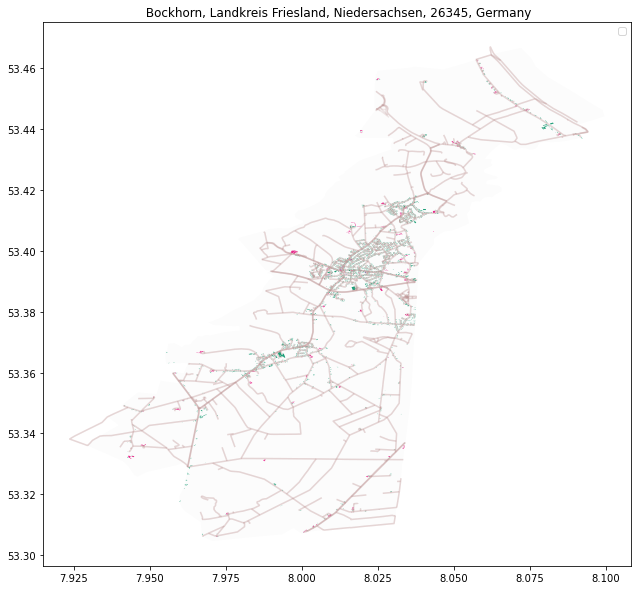

In [20]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(place_name)
plt.savefig(place_name+'_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)